<a href="https://colab.research.google.com/github/AsutoshDalei/Deep-Neural-Networks/blob/master/ECG_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electrocardiography
Electrocardiography is the process of producing an electrocardiogram. It is a graph of voltage versus time of the electrical activity of the heart using electrodes placed on the skin.

It records the electrical activity of your heart at rest. It provides information about your heart rate and rhythm, and shows if there is enlargement of the heart due to high blood pressure (hypertension) or evidence of a previous heart attack (myocardial infarction).

**For example:**
A resting ECG is different from a stress or exercise ECG 

Here, we aim to develop a robust model, capable enough to forecast an ECG signal for any person.
It is capable enough to indicate any diffe.rences in realtime and forecasted ECG

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mse= tf.keras.losses.MeanSquaredError()
%matplotlib inline

In [2]:
from google.colab import files
import io

uploaded = files.upload()

Saving finalheart5.csv to finalheart5.csv


We begin by considering a dataset containing ECG data for 5 seperate persons. However, we will train on only one.

In [4]:
df=pd.read_csv(io.BytesIO(uploaded['finalheart5.csv']))
col=['time','p1','p2','p3','p4','p5']
df.columns=col
df.head()

,time,p1,p2,p3,p4,p5
0,'0:00.000',-0.115,0.020,0.020,-0.090,0.000
1,'0:00.002',-0.115,0.015,-0.040,-0.015,-0.015
2,'0:00.004',-0.120,0.005,-0.060,0.030,-0.030
3,'0:00.006',-0.120,0.000,-0.070,0.060,-0.040
4,'0:00.008',-0.120,-0.010,-0.055,0.065,-0.055


In [5]:
df.tail()

,time,p1,p2,p3,p4,p5
9995,'0:19.990',-0.035,-0.015,0.065,0.000,0.105
9996,'0:19.992',-0.035,-0.015,0.070,0.000,0.110
9997,'0:19.994',-0.035,-0.015,0.080,0.000,0.115
9998,'0:19.996',-0.035,-0.015,0.085,0.000,0.115
9999,'0:19.998',-0.035,-0.010,0.095,0.005,0.120


We now convert the 'time' column into timestamps and set it as our index.

In [6]:
time=[]
for i in range(len(df['time'])):
  st=str(df['time'][i])
  df['time'][i]=pd.to_datetime(st[1:-1], format="%M:%S.%f")

df=df.set_index('time')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Visualization:**

We visualize our ECG data of 5 seperate persons. 

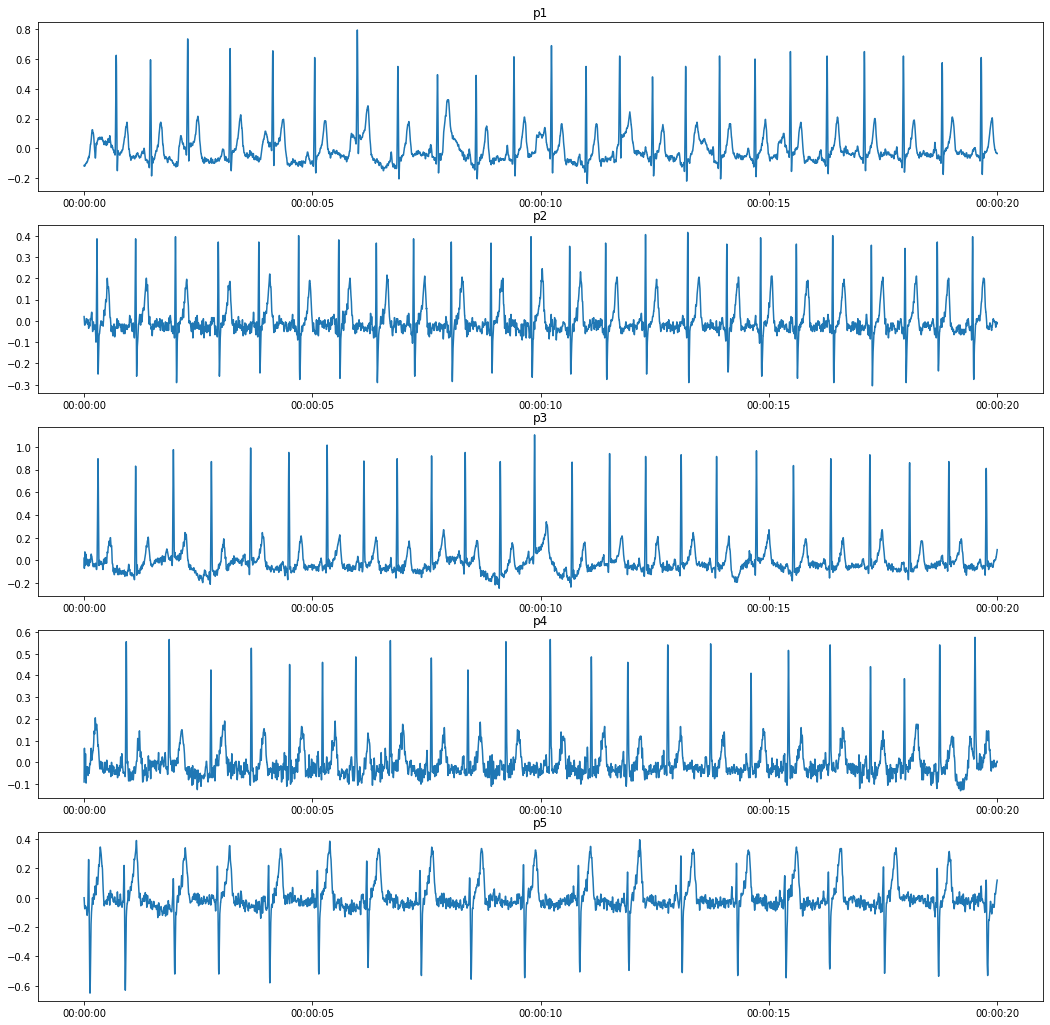

In [8]:
_,_=plt.subplots(figsize=(18,18))
for i in range(df.shape[1]):
  name=df.columns[i]
  plt.subplot(df.shape[1],1,i+1)
  plt.plot(df[name])
  plt.title(name)
plt.show()

For this model, let us consider the ECG data of person2, which looks like this. You may consider anyones data for training purpose. 

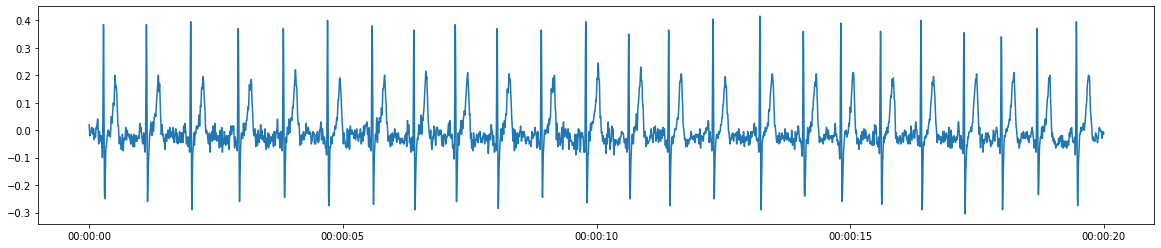

In [10]:
plt.figure(figsize=(20,4))
plt.plot(df['p2'])

We define the training and testing data for our model.


*   70% of the data is for training
*   30% of the data is for training



In [9]:
l=int(df.shape[0]*0.7)
train=df['p2'][:l]
test=df['p2'][l:]
print(train)

time
1900-01-01 00:00:00.000    0.020
1900-01-01 00:00:00.002    0.015
1900-01-01 00:00:00.004    0.005
1900-01-01 00:00:00.006    0.000
1900-01-01 00:00:00.008   -0.010
                           ...  
1900-01-01 00:00:13.990   -0.010
1900-01-01 00:00:13.992   -0.015
1900-01-01 00:00:13.994   -0.025
1900-01-01 00:00:13.996   -0.030
1900-01-01 00:00:13.998   -0.035
Name: p2, Length: 7000, dtype: float64


We then define a function that would chunk our data into numpy arrays. Our x data will have chunks of 3 samples while our y data will have the consecutive sample. 

This applies to both training and testing data.

In [11]:
def chunk(data,a):
  x,y=[],[]
  for i in range(a,len(data)):
    x.append(data[i-a:i])
    y.append([data[i]])
  return(np.array(x),np.array(y))

xtrain,ytrain=chunk(train,3)
xtest,ytest=chunk(test,3)
print(xtrain.shape)
ytest.shape

(6997, 3)


(2997, 1)

Reshaping it since LSTM networks feed in 3 Dimensional data only.

In [13]:
xtrain=xtrain.reshape(6997,3,1)
xtest=xtest.reshape(2997,3,1)
print(xtrain.shape)
xtest.shape

(6997, 3, 1)


(2997, 3, 1)

 **Defining the model**

 Here, we define the multi layer LSTM model, compile it with an Adam optimizer and Mean Squared Error loss function.

In [14]:
tf.keras.backend.clear_session()

model=tf.keras.Sequential([
                           tf.keras.layers.LSTM(3,activation='relu',input_shape=(xtrain.shape[1],xtrain.shape[-1]),return_sequences=True),
                           tf.keras.layers.LSTM(3,activation='relu',return_sequences=True),
                           #tf.keras.layers.LSTM(3,activation='relu',return_sequences=True),
                           #tf.keras.layers.LSTM(3,activation='relu',return_sequences=True),
                           tf.keras.layers.LSTM(3,activation='relu',return_sequences=True),
                           tf.keras.layers.LSTM(3,activation='relu'),
                           tf.keras.layers.Dense(1)
                           
                          ])
opt=tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer='adam',loss='mse')
histo=model.fit(x=xtrain,y=ytrain,epochs=150)

Epoch 1/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 2/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0023
Epoch 3/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 4/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 5/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 6/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 7/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 8/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 9/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 10/150
219/219 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 11/150
219/219 [==============================] - 1s 5ms/step - loss: 9.9692e-04
Epoch 12/150
219/219 [==============================] - 1s 5ms/step - loss: 9.3880e-04
Epoch

Having a look at model's performance is critical. Here we visualize the performance of the cost function and how the losses vary across the epochs.

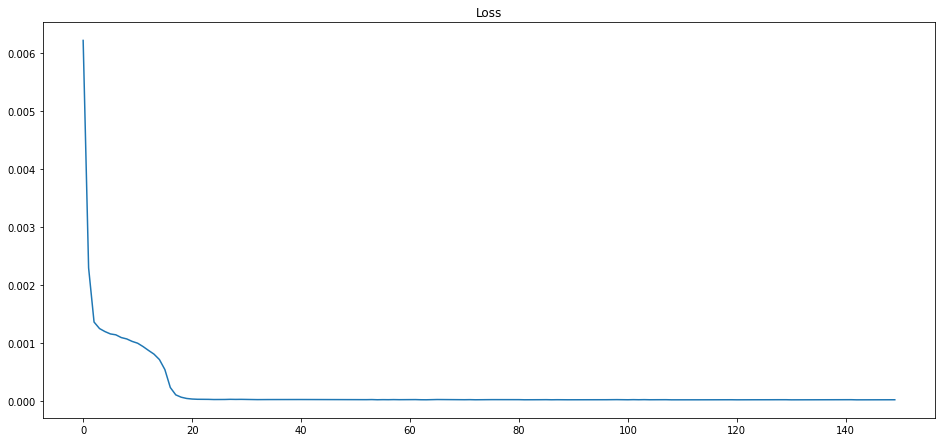

In [15]:
_,_=plt.subplots(figsize=(16,16))
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(histo.history['loss'])

This is followed by evaluating the model with the test data to look at how our model has really performed.

In [16]:
model.evaluate(xtest,ytest)

94/94 [==============================] - 0s 2ms/step - loss: 1.8572e-05


1.8572056433185935e-05

The unchunk function here is used to make our chunked data into normal 1D data. The way it used to be. Basically revert it back.

In [17]:
def unchunk(data):
  l=[]
  for i in range(data.shape[0]):
    l.append([data[i][0]])
  for j in range(1,data.shape[1]):
    l.append([data[-1][j]])
  return(np.array(l))

ypred=unchunk(model.predict(xtest))

print(ytest.shape)
ypred.shape

(2997, 1)


(2997, 1)

Let us visualize the test data and its prediction.

Note the error between them at the.

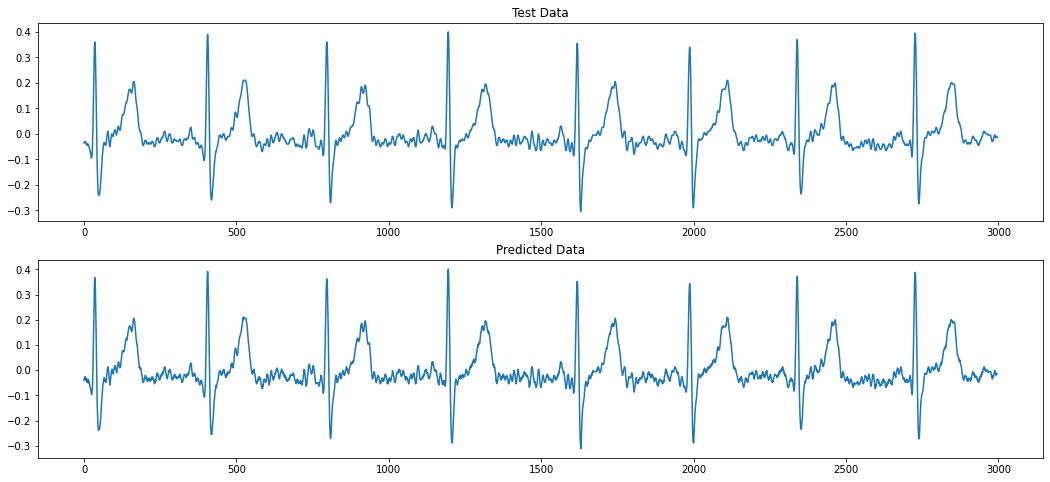


The error between these two is: 1.857205461419653e-05


In [34]:
_,_=plt.subplots(figsize=(18,8))
plt.subplot(2,1,1)
plt.plot(ytest)
plt.title('Test Data')
plt.subplot(2,1,2)
plt.plot(ypred)
plt.title('Predicted Data')
plt.show()
print()
print('The error between these two is: ' + str(mse(ypred,ytest).numpy()))

Now to have a look at the robustness of this model, lets look into how it forecasts the ECG of an entirely different person. 

Note that our model has never seen this data.
Let us consider person5.

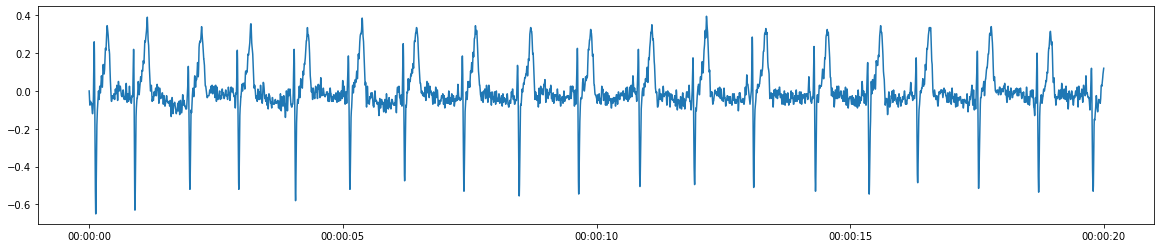

In [35]:
plt.figure(figsize=(20,4))
plt.plot(df['p5'])

We define a model that would do the entire preprocessing, predict, visualize and present us with the mean squared error for us on any new data.

We feed in the ECG for person 5, and visualize the outcomes.

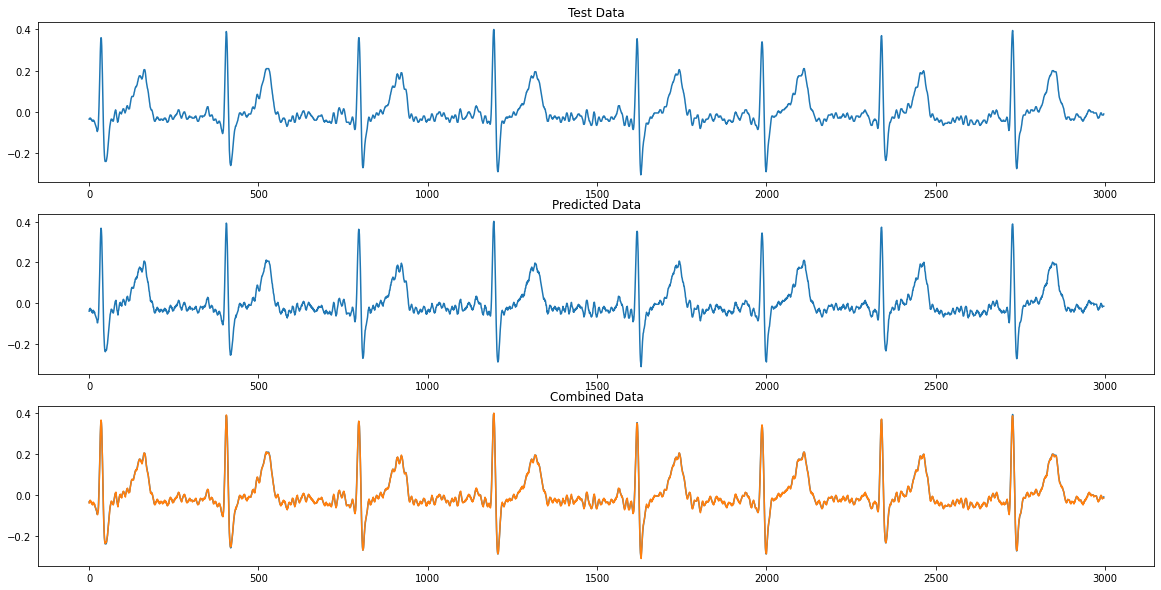


The error between these two is: 1.857205461419653e-05


In [42]:
def newsam(data):
  datx,daty=chunk(data,3)
  datx=datx.reshape(datx.shape[0],datx.shape[1],1)
  pred=unchunk(model.predict(datx))
  _,_=plt.subplots(figsize=(20,10))
  plt.subplot(3,1,1)
  plt.plot(ytest)
  plt.title('Test Data')
  plt.subplot(3,1,2)
  plt.plot(ypred)
  plt.title('Predicted Data')
  plt.subplot(3,1,3)
  plt.plot(ytest)
  plt.plot(ypred)
  plt.title('Combined Data')
  plt.show()
  print()
  print('The error between the two is: ' + str(mse(ypred,ytest).numpy()))

newsam(df['p5'])

Our model is robust enough to feed in any person's ECG data and provide a reliable forcast.

This will be helpful in the medical industry when, the overall mse loss between realtime ECG and forecasted ECG rises, indicating a health issue in the heart.